In [187]:
import os, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
dirRun = 'ID1001_POC_Nissan__4_Run'

In [189]:
Prefix = 'test_ID1001_POC_Nissan.ADValue.l'
Suffix = '_Run.csv'

In [190]:
pattern = Prefix + '[0-9]|[1-9][0-9]' + Suffix # Prefix + nb_btw_0_&_100 + Suffix

# Getting all result files
Run_files = []
for file in os.listdir(dirRun):
    if file[:len(Prefix)] == Prefix and file[-len(Suffix):] == Suffix:
#         print(file)
        Run_files.append(os.path.join(dirRun,file))
Run_files

['ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l0_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l1_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l2_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l3_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l4_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l5_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l6_Run.csv',
 'ID1001_POC_Nissan__4_Run\\test_ID1001_POC_Nissan.ADValue.l7_Run.csv']

In [191]:
tcs.ExpGene

0      Random_InitDOE
1      Random_InitDOE
2      Random_InitDOE
3      Random_InitDOE
4      Random_InitDOE
5      Random_InitDOE
6      Random_InitDOE
7      Random_InitDOE
8      Random_InitDOE
9      Random_InitDOE
10     Random_InitDOE
11     Random_InitDOE
12     Random_InitDOE
13     Random_InitDOE
14     Random_InitDOE
15     Random_InitDOE
16     Random_InitDOE
17     Random_InitDOE
18     Random_InitDOE
19     Random_InitDOE
20     Random_InitDOE
21     Random_InitDOE
22     Random_InitDOE
23     Random_InitDOE
24     Random_InitDOE
25     Random_InitDOE
26     Random_InitDOE
27     Random_InitDOE
28     Random_InitDOE
29     Random_InitDOE
            ...      
170           Random1
171           Random1
172           Random1
173           Random1
174           Random1
175           Random1
176           Random1
177           Random1
178           Random1
179           Random1
180           Random1
181           Random1
182           Random1
183           Random1
184       

In [192]:
Run_dfs = []
[Run_dfs.append(pd.read_csv(file, sep = ';')) for file in Run_files];

In [193]:
# [print(df.columns == Run_dfs[0].columns) for df in Run_dfs];

In [194]:
tcs = pd.concat(Run_dfs)
tcs.shape

(1800, 38)

In [195]:
# tcs.columns

In [196]:
unwanted_columns = ['drivelane1_num', 'vehiclesize1_num', 'lanechange1_num',
                    'drivelane2_num', 'vehiclesize2_num', 'lanechange2_num',
                    'drivelane3_num', 'vehiclesize3_num', 'lanechange3_num',
                    'vehiclesize1', 'vehiclesize2', 'vehiclesize3',
                    'starttimingoflanechange1', 'starttimingoflanechange2', 'starttimingoflanechange3', 
                    'relativelongitudinaldistance3', 'relativespeed3']
print(len(unwanted_columns))

# OR (Removing constant columns)

unwanted_columns = [col for col in tcs.columns if (len(tcs[col].unique()) == 1) or ('_num' in col)]
print(len(unwanted_columns))

17
17


In [197]:
t = tcs[[col for col in tcs.columns if col not in unwanted_columns]]

In [198]:
t.shape

(1800, 21)

In [199]:
t.columns

Index(['Desig_Sce', 'LoopNum', 'ExpGene', 'ForCrit',
       'relativelongitudinaldistance1', 'relativespeed1', 'acceleration1',
       'relativelongitudinaldistance2', 'relativespeed2', 'acceleration2',
       'acceleration3', 'drivelane1', 'lanechange1', 'drivelane2',
       'lanechange2', 'drivelane3', 'lanechange3', 'closestdistance1',
       'closestdistance2', 'closestdistance3', 'ClosestDistance'],
      dtype='object')

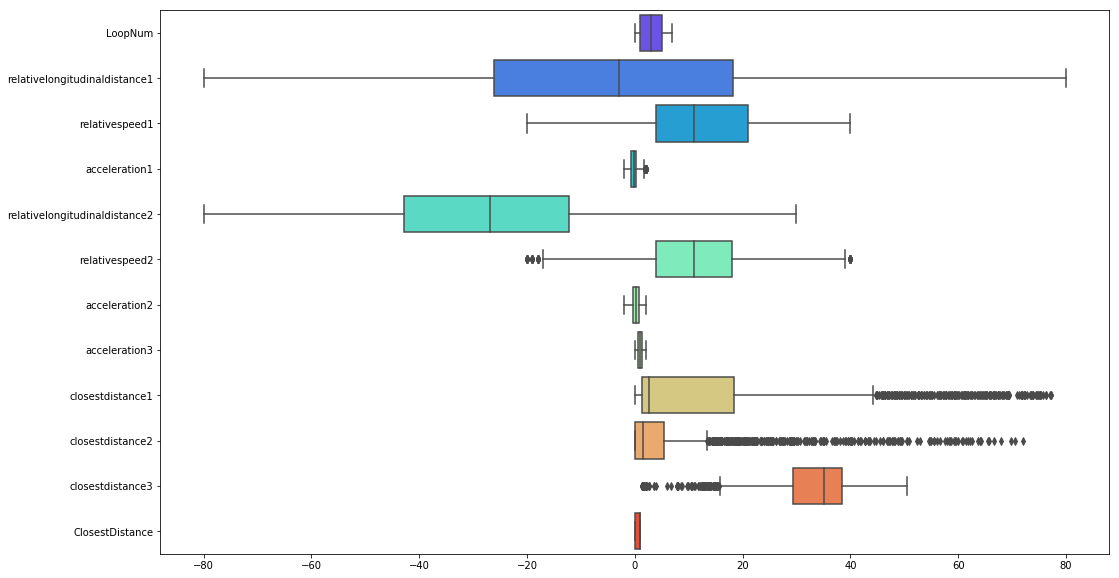

In [200]:
plt.figure(figsize=(17,10))
sns.boxplot(data=t, palette='rainbow', orient='h')

In [201]:
# sns.boxplot()

<Figure size 1224x720 with 0 Axes>

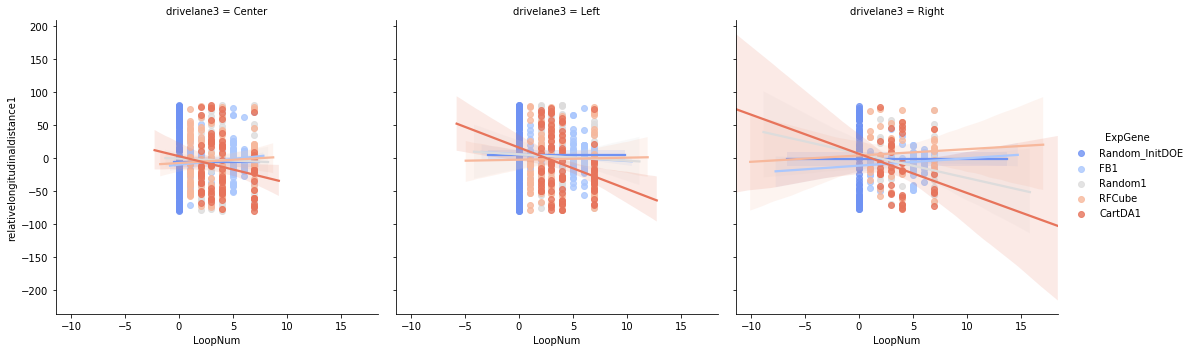

In [222]:
plt.figure(figsize=(17,10))
sns.lmplot(x='LoopNum', y='relativelongitudinaldistance1', hue='ExpGene', data=t[:], palette='coolwarm', col = 'drivelane3')

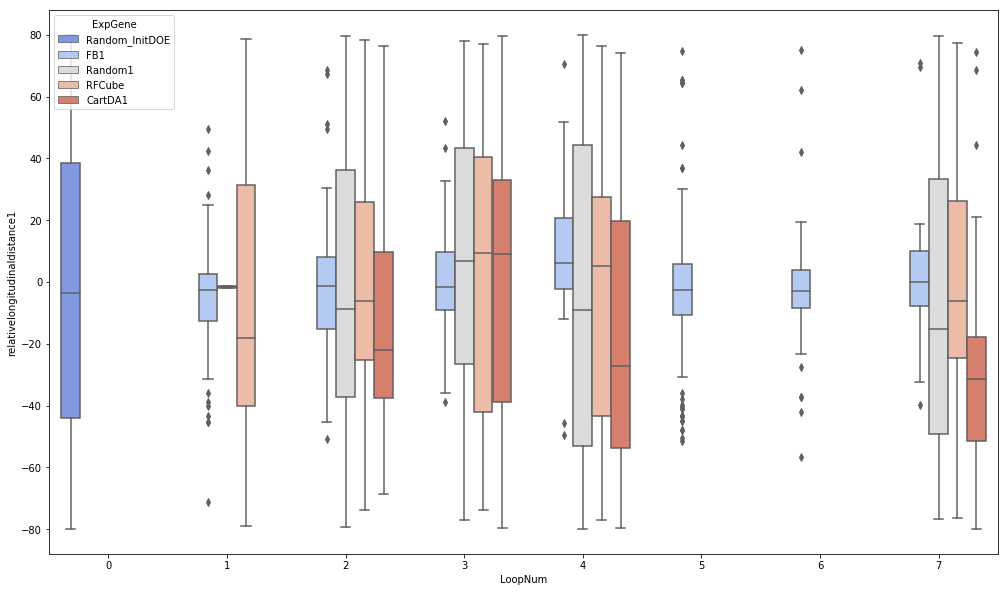

In [224]:
plt.figure(figsize=(17,10))
sns.boxplot(x='LoopNum', y='relativelongitudinaldistance1', hue='ExpGene', data=t[:], palette='coolwarm')

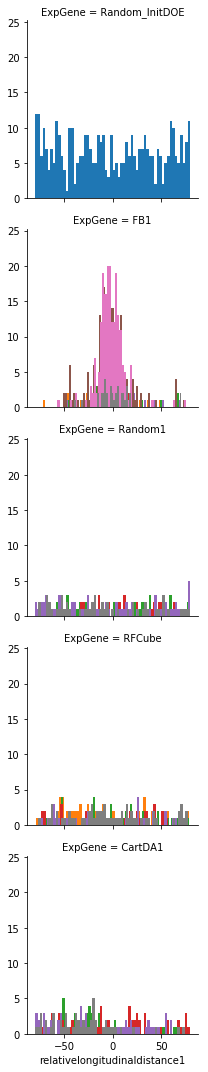

In [240]:
g = sns.FacetGrid(t, row="ExpGene", hue='LoopNum')
g = g.map(plt.hist, "relativelongitudinaldistance1", bins=60)

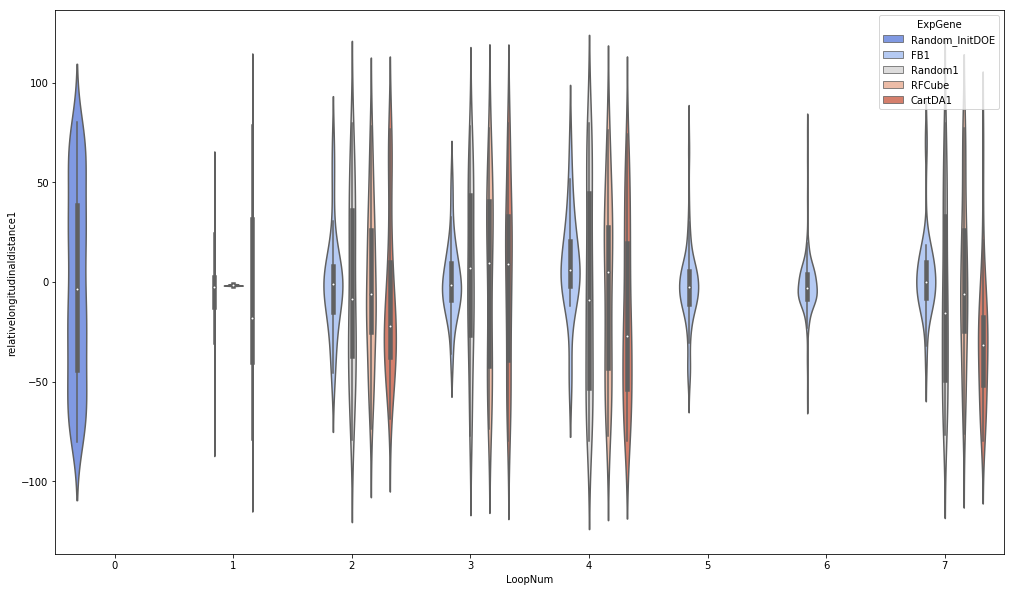

In [220]:
plt.figure(figsize=(17,10))
sns.violinplot(x='LoopNum', y='relativelongitudinaldistance1', hue='ExpGene', data=t[:], palette='coolwarm')

In [203]:
tt = t[['relativelongitudinaldistance1', 'relativespeed1', 'acceleration1']]

In [204]:
t.head()

,Desig_Sce,LoopNum,ExpGene,ForCrit,relativelongitudinaldistance1,relativespeed1,acceleration1,relativelongitudinaldistance2,relativespeed2,acceleration2,...,drivelane1,lanechange1,drivelane2,lanechange2,drivelane3,lanechange3,closestdistance1,closestdistance2,closestdistance3,ClosestDistance
0,ID1001_POC_Nissan.ADValue.l0_0001,0,Random_InitDOE,NoCrit,10.1,-8,0.8,-50.7,6,0.7,...,Center,Center,Center,Left,Center,Left,5.191123,1.588327,21.135098,0
1,ID1001_POC_Nissan.ADValue.l0_0002,0,Random_InitDOE,NoCrit,64.5,-17,1.5,-73.6,27,0.1,...,Center,Left,Center,Left,Center,Left,54.202249,1.602259,37.481093,0
2,ID1001_POC_Nissan.ADValue.l0_0003,0,Random_InitDOE,NoCrit,59.5,-12,0.0,-5.6,17,-0.7,...,Left,Center,Center,Center,Center,Center,22.450742,1.550000,39.214496,0
3,ID1001_POC_Nissan.ADValue.l0_0004,0,Random_InitDOE,NoCrit,23.8,9,-1.8,-48.0,-10,1.3,...,Right,Left,Center,Center,Left,Center,4.961820,0.000000,29.670173,1
4,ID1001_POC_Nissan.ADValue.l0_0005,0,Random_InitDOE,NoCrit,-76.9,-5,1.9,-73.4,19,-1.4,...,Left,Right,Center,Left,Left,Right,0.000000,50.971573,25.378706,1


In [205]:
t.pivot_table(index = ['Desig_Sce'])

,ClosestDistance,LoopNum,acceleration1,acceleration2,acceleration3,closestdistance1,closestdistance2,closestdistance3,relativelongitudinaldistance1,relativelongitudinaldistance2,relativespeed1,relativespeed2
Desig_Sce,,,,,,,,,,,,
ID1001_POC_Nissan.ADValue.l0_0001,0,0,0.8,0.7,0.5,5.191123,1.588327,21.135098,10.1,-50.7,-8,6
ID1001_POC_Nissan.ADValue.l0_0002,0,0,1.5,0.1,1.6,54.202249,1.602259,37.481093,64.5,-73.6,-17,27
ID1001_POC_Nissan.ADValue.l0_0003,0,0,0.0,-0.7,1.4,22.450742,1.550000,39.214496,59.5,-5.6,-12,17
ID1001_POC_Nissan.ADValue.l0_0004,1,0,-1.8,1.3,0.2,4.961820,0.000000,29.670173,23.8,-48.0,9,-10
ID1001_POC_Nissan.ADValue.l0_0005,1,0,1.9,-1.4,0.3,0.000000,50.971573,25.378706,-76.9,-73.4,-5,19
ID1001_POC_Nissan.ADValue.l0_0006,1,0,0.5,-0.4,1.4,1.112383,0.840048,36.579122,-72.3,-43.8,35,31
ID1001_POC_Nissan.ADValue.l0_0007,1,0,1.6,0.8,0.5,0.000000,1.299603,19.594470,-15.4,-21.5,-3,36
ID1001_POC_Nissan.ADValue.l0_0008,0,0,0.4,0.2,1.4,12.463154,5.048925,46.730984,18.0,-0.2,-20,30
ID1001_POC_Nissan.ADValue.l0_0009,0,0,-1.5,-1.8,0.9,12.337473,21.471729,31.681127,21.0,-32.5,26,15


In [206]:
g = sns.catplot(x="sex", y="total_bill",
...                 hue="smoker", col="time",
...                 data=tips, kind="box",
...                 height=4, aspect=.7)

NameError: name 'tips' is not defined

In [207]:
o=tcs[['Desig_Sce', 'LoopNum', 'relativelongitudinaldistance1', 'relativespeed1']]

In [208]:
o.head()

,Desig_Sce,LoopNum,relativelongitudinaldistance1,relativespeed1
0,ID1001_POC_Nissan.ADValue.l0_0001,0,10.1,-8
1,ID1001_POC_Nissan.ADValue.l0_0002,0,64.5,-17
2,ID1001_POC_Nissan.ADValue.l0_0003,0,59.5,-12
3,ID1001_POC_Nissan.ADValue.l0_0004,0,23.8,9
4,ID1001_POC_Nissan.ADValue.l0_0005,0,-76.9,-5


In [209]:
u=o[:10].unstack()

In [210]:
type(u)

pandas.core.series.Series

In [211]:
pd.DataFrame(u)

0
Desig_Sce                     0  ID1001_POC_Nissan.ADValue.l0_0001
                              1  ID1001_POC_Nissan.ADValue.l0_0002
                              2  ID1001_POC_Nissan.ADValue.l0_0003
                              3  ID1001_POC_Nissan.ADValue.l0_0004
                              4  ID1001_POC_Nissan.ADValue.l0_0005
                              5  ID1001_POC_Nissan.ADValue.l0_0006
                              6  ID1001_POC_Nissan.ADValue.l0_0007
                              7  ID1001_POC_Nissan.ADValue.l0_0008
                              8  ID1001_POC_Nissan.ADValue.l0_0009
                              9  ID1001_POC_Nissan.ADValue.l0_0010
LoopNum                       0                                  0
                              1                                  0
                              2                                  0
                              3                                  0
                              4                                  0
                              5                                  0
                              6                                  0
                              7                                  0
                              8                                  0
                              9                                  0
relativelongitudinaldistance1 0                               10.1
                              1                               64.5
                              2                               59.5
                              3                               23.8
                              4                              -76.9
                              5                              -72.3
                              6                              -15.4
                              7                                 18
                              8                                 21
                              9                               21.9
relativespeed1                0                                 -8
                              1                                -17
                              2                                -12
                              3                                  9
                              4                                 -5
                              5                                 35
                              6                                 -3
                              7                                -20
                              8                                 26
                              9                                -15

In [212]:
u.index

MultiIndex(levels=[['Desig_Sce', 'LoopNum', 'relativelongitudinaldistance1', 'relativespeed1'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [213]:
import numpy as np
import random

In [241]:
nb_sample_per_loop = 5

loopnum_col = list(0*np.ones(nb_sample_per_loop)) + list(np.ones(nb_sample_per_loop))
rs_col = list(np.random.random_sample(nb_sample_per_loop)) + list(0.2+np.random.random_sample(nb_sample_per_loop) )
rld_col = list(0.5+np.random.random_sample(nb_sample_per_loop)) + list(0.3+np.random.random_sample(nb_sample_per_loop) )

z=pd.DataFrame({'LoopNum':loopnum_col, 'rs': rs_col, 'rld': rld_col})

z

,LoopNum,rs,rld
0,0.0,0.271772,0.943187
1,0.0,0.118249,0.733297
2,0.0,0.339515,0.942577
3,0.0,0.713562,0.859604
4,0.0,0.522464,0.522537
5,1.0,0.628453,0.367504
6,1.0,0.797458,0.934775
7,1.0,0.942911,0.497802
8,1.0,1.084703,0.962994
9,1.0,0.442290,0.502903


In [247]:
zd = z[['rs', 'rld']]
zdu = pd.DataFrame(zd.unstack())
zdu.columns = ['vals']
zdu

vals
rs  0  0.271772
    1  0.118249
    2  0.339515
    3  0.713562
    4  0.522464
    5  0.628453
    6  0.797458
    7  0.942911
    8  1.084703
    9  0.442290
rld 0  0.943187
    1  0.733297
    2  0.942577
    3  0.859604
    4  0.522537
    5  0.367504
    6  0.934775
    7  0.497802
    8  0.962994
    9  0.502903

In [248]:
zdu['LoopNum'] = zd.shape[1] * loopnum_col
zdu['ljhjb'] = zd.shape[1] * loopnum_col
zdu

vals  LoopNum  ljhjb
rs  0  0.271772      0.0    0.0
    1  0.118249      0.0    0.0
    2  0.339515      0.0    0.0
    3  0.713562      0.0    0.0
    4  0.522464      0.0    0.0
    5  0.628453      1.0    1.0
    6  0.797458      1.0    1.0
    7  0.942911      1.0    1.0
    8  1.084703      1.0    1.0
    9  0.442290      1.0    1.0
rld 0  0.943187      0.0    0.0
    1  0.733297      0.0    0.0
    2  0.942577      0.0    0.0
    3  0.859604      0.0    0.0
    4  0.522537      0.0    0.0
    5  0.367504      1.0    1.0
    6  0.934775      1.0    1.0
    7  0.497802      1.0    1.0
    8  0.962994      1.0    1.0
    9  0.502903      1.0    1.0

In [244]:
zdu.reset_index(inplace=True)
print(zdu.columns)
# zdu.drop(['level_1'], axis = 1)
zdu

Index(['level_0', 'level_1', 'vals', 'LoopNum'], dtype='object')


,level_0,level_1,vals,LoopNum
0,rs,0,0.271772,0.0
1,rs,1,0.118249,0.0
2,rs,2,0.339515,0.0
3,rs,3,0.713562,0.0
4,rs,4,0.522464,0.0
5,rs,5,0.628453,1.0
6,rs,6,0.797458,1.0
7,rs,7,0.942911,1.0
8,rs,8,1.084703,1.0
9,rs,9,0.442290,1.0


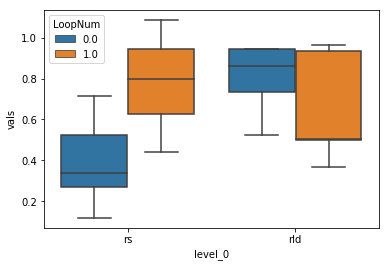

In [245]:
sns.boxplot(data = zdu, x = 'level_0', y = 'vals', hue = 'LoopNum')

In [246]:
import os
os.getcwd()

'C:\\Users\\a073791\\Notebook_Playing'

In [ ]:
g = sns.FacetGrid(t, row="ExpGene", hue='LoopNum')
g = g.map(plt.hist, "relativelongitudinaldistance1", bins=60)